In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats.mstats import normaltest
from scipy.stats import levene
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('17_sem_nal_Izak_Jenko/Pulz.csv')
pd.options.display.max_rows = 15

# Točka a)

Najprej pripravimo podatke

In [3]:
data.insert(0, 'sprememba pulza', data['PULZ2'] - data['PULZ1'])

In [4]:
obremenjeni = data[data['OBREMENITEV'] == 1]
neobremenjeni = data[data['OBREMENITEV'] == 2]

Ničelno hipotezo
$$
    H_0 : \mu_1 = \mu_2,
$$
kjer je $\mu_1$ resnična povprečna sprememba pulza v skupini študentov deležnih obremenitve, $\mu_2$ pa je povprečna sprememba pulza v skupini štvudntov brez obrememnitvem, bomo testirali z Welchevim $t$-testom. Testirali bomo torej če nam odstopanje vzorčnih povprečji $\bar{X}_1$ in $\bar{X}_2$ pojasni posebna izbira našega vzorca ali pa je za tem razlog, da obremenitev res vpliva na spremembo pulza.  Predpostavljamo, da je pulz pri človeku porazdeljen normalno, torej bo tudi sprememba pulza kot razlika dveh normalnih podatkov normalno porazdeljena. Ob tem pa smo se rajši odločili za Welchev $t$-test namesto za Studentov $t$-test, ker se varianci v skupinah precej razlikujeta, kot lahko vidimo:

In [5]:
N_1, N_2 = obremenjeni.shape[0], neobremenjeni.shape[0]

In [6]:
var_1, var_2 = obremenjeni['sprememba pulza'].var(), neobremenjeni['sprememba pulza'].var()
# to sta nepristranski cenilki za varianco posameznih skupin, npr.:
#   var_1 = sum((obremenjeni['sprememba pulza'] - mean_1)**2)/(N_1 - 1) 

np.sqrt(var_1), np.sqrt(var_2)

(21.089732373697938, 3.9226390063570147)

Vidimo torej, da je $s_1 > 2s_2$, kjer je 
$$
s_1^2 = \frac{1}{N_1 - 1}\sum_{i = 1}^{N_1} (X_{1i} - \bar{X_1})^2
$$ 
nepristranska cenilka vzorčne variance za skupino obremenjenih študentov. Analogno je definiran $s^2_2$.

Poglejmo sedaj kaj pove Welchev $t$-test (obojestranski), kjer je testna statistika podana kot
$$
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{s_{X_1}^2 + s_{X_2}^2}},
\quad \quad s^2_{\bar{X}_i} = \frac{s^2_i}{N_i}.
$$
Ta statistika je aproksimirana s Studentovo $t$-porazdelitvijo s približno 
$$
\hat{v} = \frac{\left(\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}\right)^2}{\frac{s_1^4}{N_1^2(N_1 - 1)} + \frac{s_2^4}{N_2^2(N_2 - 1)}} 
$$
prostostnimi stopnjami. To je Welch-Satterthwaitova enačba. Podobna je parametru, ki ga uporabljamo pri ocenjevanju vzorčnega povprečja pri stratificiranem vzorčenju, kjer ne poznamo stratumskih varianc (če sta stratuma samo dva).

In [7]:
ttest_ind(obremenjeni['sprememba pulza'], neobremenjeni['sprememba pulza'], equal_var=False)

Ttest_indResult(statistic=16.639875394889604, pvalue=2.1372052868587068e-21)

Pod predpostavko ničelne hipoteze bi dobili vsaj tako ekstremen rezultat (kot so naši podatki) z verjetnostjo velikostnega reda $10^{-21}$, 
$$
p = \texttt{P}(|T| \geq t_{stat}) = 2(1 - \texttt{P}(T < t_{stat})) = 2(1 - F_{\text{Student}(\hat{v})}(t_{stat})), \quad \text{ kjer je } \quad T \sim \text{Student}(\hat{v})
$$

To je zelo malo verjetno in je seveda pod mejo $\alpha = 0.01$, zato na podlagi tega testa ničelo hipotezo o enakih povprečjih zavrnemo. To pomeni, da obremenitev študenta vpliva na spremembo njegovega pulza.  

Poskusimo še sami razviti Welchev $t$-test, sledimo <https://en.wikipedia.org/wiki/Welch%27s_t-test>

In [8]:
X_1, X_2  = obremenjeni['sprememba pulza'].mean(), neobremenjeni['sprememba pulza'].mean()
# se1, se2 = np.sqrt(var_1/N_1), np.sqrt(var_2/N_2), 

# testna statistika bo
t_stat = (X_1 - X_2) / np.sqrt(var_1/N_1 + var_2/N_2)

# prostostne stopnje

v = ((var_1**2/N_1 + var_2**2/N_2)**2 / 
    ( var_1**4/(N_1**2 * (N_1 - 1)) + var_2**4/(N_2**2 * (N_2 - 1)) ))

In [9]:
p_value = 2 * (1 - t.cdf(t_stat, v))

Tudi ta test nam z zelo majhno $p$-vrednostjo $0.0$ (vrednost je tako majhna, da je python ne razume kot predstavljivo število) potrdi, da lahko ničelno hipotezo -- o tem da obremenitev ne vpliva na spremembo pulza -- zavržemo. 

# Točka b)

[Text(0, 0, 'vadi veliko'),
 Text(0, 0, 'vadi zmerno'),
 Text(0, 0, 'vadi malo ali sploh ne')]

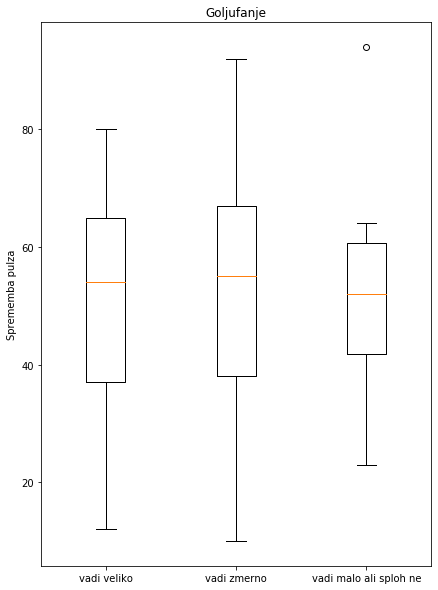

In [59]:
obremenjeni_vadba = [pd.DataFrame(obremenjeni[obremenjeni['VADBA'] == stopnja].groupby('sprememba pulza'))[0] for stopnja in range(1,4)]

figb = plt.figure(1, figsize=(7,10))
axb = figb.add_subplot(111)
axb.set_ylabel('Sprememba pulza')
axb.set_title('Goljufanje')
boxplot = axb.boxplot(obremenjeni_vadba)

axb.set_xticklabels(['vadi veliko', 'vadi zmerno', 'vadi malo ali sploh ne'])


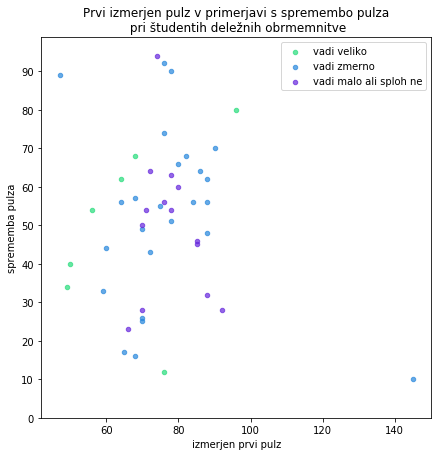

In [68]:
figb2 = plt.figure(1, figsize=(7,7))
axb2 = figb2.add_subplot(111)
colors = ['#26DC7B','#2687DC','#6526DC']
label = ['vadi veliko', 'vadi zmerno', 'vadi malo ali sploh ne']

for i in range(3):
    obremenjeni[obremenjeni['VADBA'] == i+1].plot.scatter(
        x='PULZ1', y='sprememba pulza', ax=axb2, color=colors[i], label=label[i], alpha=0.7
    )


axb2.set_title(
    'Prvi izmerjen pulz v primerjavi s spremembo pulza\n pri študentih deležnih obrmemnitve'
)
axb2.set_xlabel('izmerjen prvi pulz')
axb2.set_yticks(range(0,100,10))
axb2.legend(loc='best')

Empirično bi lahko sklepali, da študentje izbrani za obrmeneitev niso goljufali s tem, da niso tekli. Vsi, ki so imeli majhno spremembo pulza (recimo manj kot 30) bodisi vadijo veliko in imajo natrenirano srce, ali pa so že prvo meritev opravili z neobičajno visokim pulzom in se jim zaradi tega ni mogel med obremenitvijo drastično dvigniti, kar se odraža v majhni spremembi pulza. Mogoče so hiteli na testiranje, ker so zamujali, in so zaradi tega že imeli povišan pulz ob prvem merjenju.

# Točka c)

Najprej testirajmo, če so vzorčne variance vseh treh skupin enake -- homoskedastičnost (homogenost variance). V preimeru da so, bomo uporabili test ANOVA za preizkušanje domneve ali so povprečja po skupinah enaka. 

In [12]:
vadi_veliko = obremenjeni[obremenjeni.VADBA == 1]
vadi_zmerno = obremenjeni[obremenjeni.VADBA == 2]
vadi_malo = obremenjeni[obremenjeni.VADBA == 3] 

ttest_ind(vadi_veliko['sprememba pulza'], vadi_malo['sprememba pulza'], equal_var=False)

Ttest_indResult(statistic=0.02135379367516377, pvalue=0.9833800133222128)

In [13]:
ttest_ind(vadi_veliko['sprememba pulza'], vadi_zmerno['sprememba pulza'], equal_var=False)

Ttest_indResult(statistic=-0.27330070355324115, pvalue=0.7904816809371487)

In [14]:
ttest_ind(vadi_zmerno['sprememba pulza'], vadi_malo['sprememba pulza'], equal_var=False)

Ttest_indResult(statistic=0.43030326011332753, pvalue=0.6699021725863663)

In [15]:
# levenov test za homogenost varianc
levene(vadi_veliko['sprememba pulza'], vadi_zmerno['sprememba pulza'], vadi_malo['sprememba pulza'], center='mean')

LeveneResult(statistic=0.41921882687879003, pvalue=0.6602187164473925)

S $p$-vrednostjo $0.66$, lahko z Levenovim testom sklepamo, da imajo tri skupine študentov z obremenitvijo glede na to koliko vadijo približno enake variance spremembe pulza. Z drugimi besedami je sprememba pulza v vseh treh skupinah približno enako razpršena okrog povprečja, kot lahko empirično potrdimo iz grafikona.

Text(0.5, 1.0, 'Sprememba pulza glede na stopnjo vadbe\npri študentih z obremenitvijo')

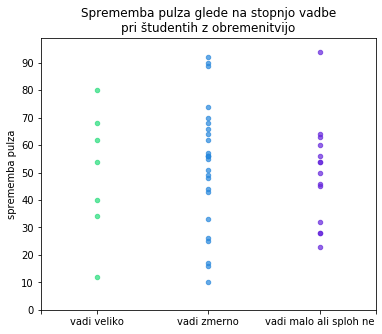

In [75]:
figc = plt.figure(1,figsize=(6,5))
axc = figc.add_subplot(111)

for i in range(3):
    obremenjeni[obremenjeni['VADBA'] == i+1].plot.scatter(
        x='VADBA', y='sprememba pulza', ax=axc, color=colors[i], alpha=0.7,
        )

plt.xticks([0.5,1,2,3,3.5],['', 'vadi veliko', 'vadi zmerno', 'vadi malo ali sploh ne', ''])
plt.yticks(range(0,100,10))
axc.set_xlabel('')
axc.set_title('Sprememba pulza glede na stopnjo vadbe\npri študentih z obremenitvijo')
# obremenjeni.plot.scatter('VADBA', 'sprememba pulza', alpha=0.7)

Sedaj bomo za študente, ki so bili deležni obrmemenitve, testirali ničelno hipotezo
$$
H_0: \text{vadba nima vpliva na spremembo pulza}.
$$
Z drugimi besedami, bi bilo smiselno za ničelno hipotezo vzeti $H_0 : \mu_1 = \mu_2 = \mu_3$, kjer so $\mu_1, \mu_2, \mu_3$ povprečja po skupinah študentov ki vadijo veliko, zmerno oziroma malo ali skoraj nič. To hipotezo bomo testirali z analizo variance -- krajše ANOVA. Ta test prepostavlja naslednje:
* Ekspirimentalna napaka pri merjenju podatkov je približno normalno porazdeljena (to bomo privzeli).
* Homogenost variance (to nam je potrdil Levenov test zgoraj)
* Posamezne enote vzorca so neodvisne drug od druge (tudi to bomo privzeli) 

In [18]:
f_oneway(vadi_veliko['sprememba pulza'], vadi_zmerno['sprememba pulza'], vadi_malo['sprememba pulza'])

F_onewayResult(statistic=0.09837114039606569, pvalue=0.9065158349208323)

Vidimo, da je $p$-vrednost precej velika, kar pomeni, da bi vsaj tako ekstremen rezulat, kot je naš, dobili precej pogosto -- naš vzorec torej ni preveč ekstremen. Na podlagi tega testa lahko tako statistično sklepamo, da je ničelna hipoteza resnična, kar pomeni, da vadba nima vpliva na spremembo pulza pri študentih z obrmenitvijo.